In [70]:
import scipy.integrate
import numpy as np
import pandas as pd

In [71]:
R0 =  2.2 #2.2 #Reproduction number
D_incubation =  5.2 #Length of incubation period
D_infectious =  1 # Duration patient is infectious
population =  1380004000 # 1,38,00,04,000 # Source WHO 2020 

In [72]:
def model(y, t, D_inf = D_infectious, Rt = R0):
    # :param array y: S E I R values
    # :param array t: Time array (days)
    
    N = population
    beta = Rt / D_inf
    sigma = 1 / D_incubation
    gamma = 1 / D_inf
    
    S, E, I, R = y
    
    dS = -beta * S * I / N
    dE = beta * S * I / N - sigma * E
    dI = sigma * E - gamma * I
    dR = gamma * I

    return ([dS, dE, dI, dR])

In [73]:
def solve(model, population, E0):
    T = np.arange(365)
    Y0 = population - E0, E0, 0, 0 # S, E, I, R at initial step

    y_data_var = scipy.integrate.odeint(model, Y0, T)
    S, E, I, R = y_data_var.T  # transpose and unpack
    return T, S, E, I, R

In [74]:
for initp in [1,100,1000,10000]:
    X, S, E, I, R = solve(model, population, initp)
    i_peak = np.amax(I)
    day = np.where(i_peak == I)
    print("Peak day =" ,day[0], "Peak infected =", i_peak, "Peak Death =", i_peak*0.03)
    

Peak day = [125] Peak infected = 41470115.505307764 Peak Death = 1244103.465159233
Peak day = [98] Peak infected = 41481896.42743888 Peak Death = 1244456.8928231662
Peak day = [84] Peak infected = 41432907.36236973 Peak Death = 1242987.2208710918
Peak day = [71] Peak infected = 41481061.52882325 Peak Death = 1244431.8458646974


The above table shows that the Peak day gets effected by the initial number of cases reported

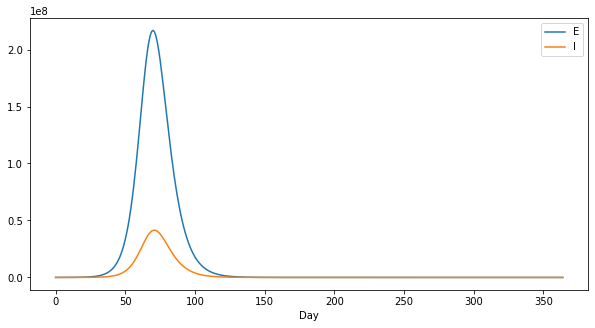

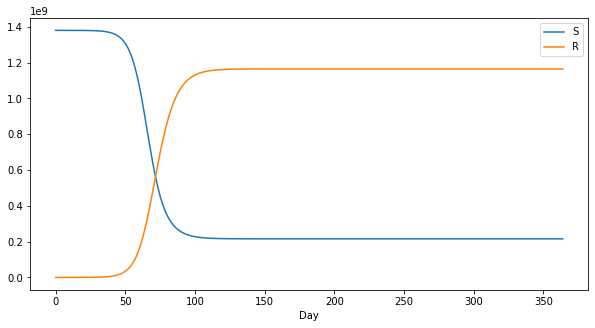

In [75]:
r = pd.DataFrame({
    "Day": X,
    "S": S,
    "E": E,
    "I": I,
    "R": R
})
r.plot(
    x = "Day",
    y = ["E", "I"],
    figsize = (10, 5)
)

# Scales are different hence plotting separately
r.plot(
    x = "Day",
    y = ["S", "R"],
    figsize = (10, 5)
)